In [1]:
import pandas as pd
import numpy as np

# Generate synthetic dataset
np.random.seed(42)
n_rows = 5000

data = {
    "Age": np.random.randint(18, 70, size=n_rows),
    "Income": np.random.randint(20, 200, size=n_rows) * 1000,
    "SpendingScore": np.random.randint(1, 100, size=n_rows),
    "Gender": np.random.choice(["Male", "Female"], size=n_rows),
    "Purchased": np.random.choice([0, 1], size=n_rows, p=[0.7, 0.3])  # Target variable
}

df = pd.DataFrame(data)

# Save dataset to CSV
df.to_csv("customer_data.csv", index=False)
print("Dataset saved as 'customer_data.csv'")

Dataset saved as 'customer_data.csv'


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("customer_data.csv")

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Handle missing values (if any) - Only for numeric columns
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Encode categorical variables
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])

# Check for outliers (using IQR for numerical columns)
Q1 = df[["Age", "Income", "SpendingScore"]].quantile(0.25)
Q3 = df[["Age", "Income", "SpendingScore"]].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df[["Age", "Income", "SpendingScore"]] < (Q1 - 1.5 * IQR)) | (df[["Age", "Income", "SpendingScore"]] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Data after preprocessing:\n", df.head())

Missing values:
 Age              0
Income           0
SpendingScore    0
Gender           0
Purchased        0
dtype: int64
Data after preprocessing:
    Age  Income  SpendingScore  Gender  Purchased
0   56  148000             88       1          0
1   69  157000              2       1          1
2   46  183000             84       1          1
3   32   92000             98       0          1
4   60   65000             43       1          1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            5000 non-null   int64
 1   Income         5000 non-null   int64
 2   SpendingScore  5000 non-null   int64
 3   Gender         5000 non-null   int32
 4   Purchased      5000 non-null   int64
dtypes: int32(1), int64(4)
memory usage: 175.9 KB
Dataset Info:
 None
Descriptive Statistics:
                Age         Income  SpendingScore       Gender    Purchased
count  5000.000000    5000.000000    5000.000000  5000.000000  5000.000000
mean     43.584600  110500.200000      50.237600     0.493600     0.285600
std      14.919094   51610.308319      28.585132     0.500009     0.451745
min      18.000000   20000.000000       1.000000     0.000000     0.000000
25%      31.000000   66000.000000      25.000000     0.000000     0.000000
50%      43.000000  111000.000000      51.000000     0.

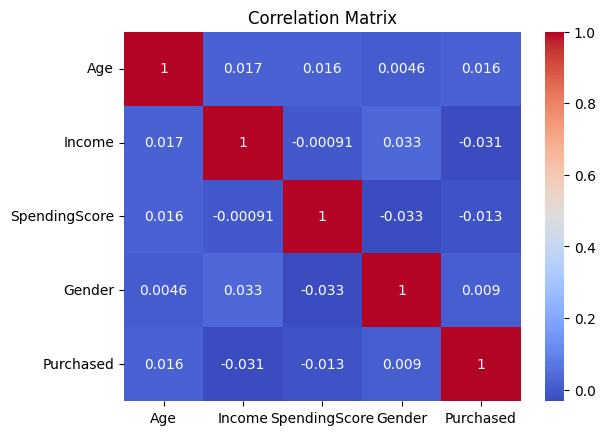

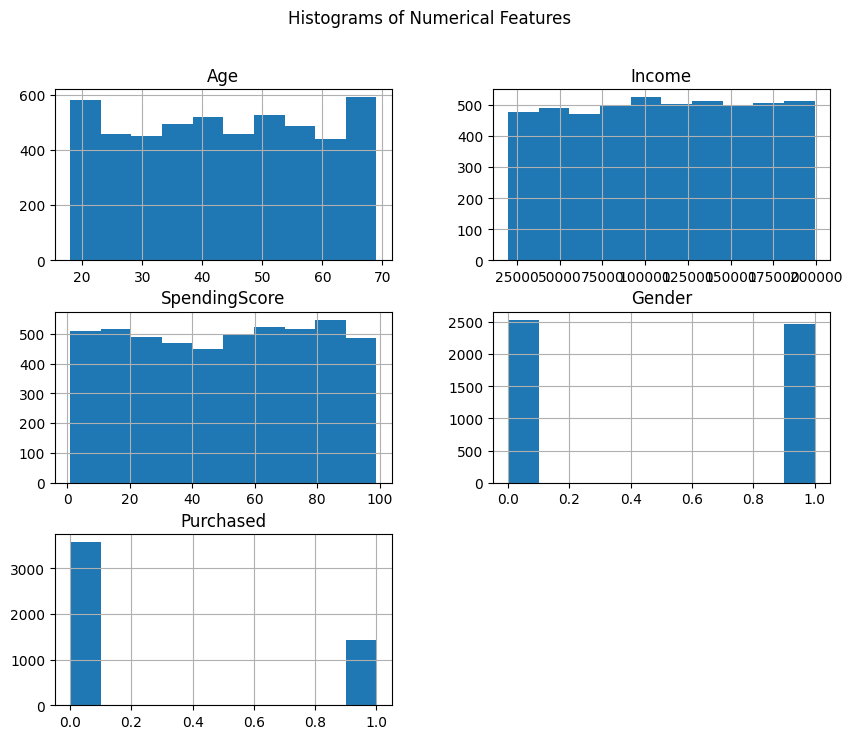

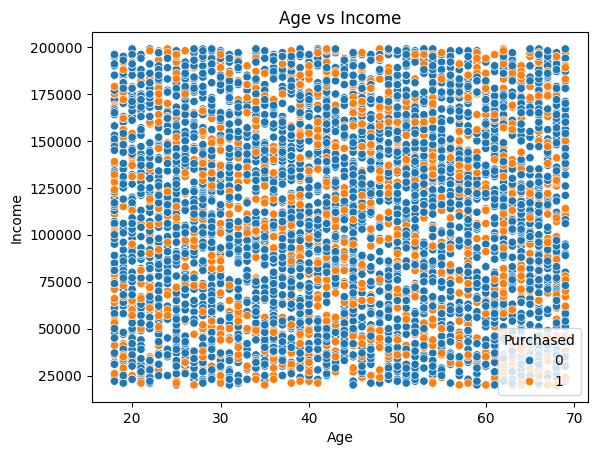

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic insights
print("Dataset Info:\n", df.info())
print("Descriptive Statistics:\n", df.describe())

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Histograms for numerical features
df.hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Scatter plot for Age vs Income
sns.scatterplot(x="Age", y="Income", hue="Purchased", data=df)
plt.title("Age vs Income")
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.657
Confusion Matrix:
 [[642  61]
 [282  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.91      0.79       703
           1       0.20      0.05      0.08       297

    accuracy                           0.66      1000
   macro avg       0.45      0.48      0.43      1000
weighted avg       0.55      0.66      0.58      1000

